In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#   Ignore warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
# base_path = '/content/drive/MyDrive/'
base_path = '/content/drive/MyDrive/'
import os
os.path.isdir(base_path)

True

In [4]:
import cv2
import matplotlib.pyplot as plt


In [5]:
%cd /content/drive/MyDrive/Yolo
%run utils.py

/content/drive/MyDrive/Yolo


In [6]:
%cd /content/drive/MyDrive/Yolo
%run darknet.py

/content/drive/MyDrive/Yolo


In [7]:
cfg_file = base_path + 'Yolo/cfg/yolov3.cfg'
weight_file = base_path + 'Yolo/weights/yolov3.weights'
names_file = base_path + 'Yolo/data/coco.names'

#   Load network architector
model = Darknet(cfg_file)
#   Load pre-trained weights
model.load_weights(weight_file)
#   Load the COCO object classes
class_names = load_class_names(names_file)

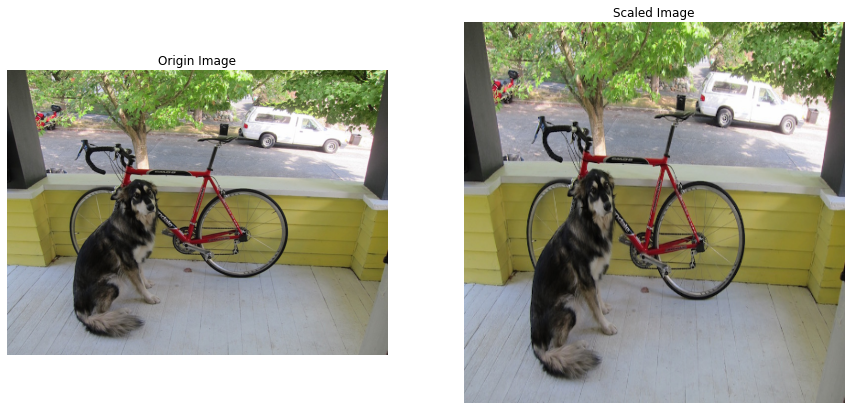

In [16]:
plt.rcParams['figure.figsize'] = [15, 15]

#   Load image
img = cv2.imread(os.path.join(base_path, "Yolo/images/dog.jpg"))

#   Convert to RGB
origin_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#   Resize image to the input width and height that model requires
img_resize = cv2.resize(origin_img, (model.width, model.height))

#   Display images
plt.subplot(1, 2, 1)
plt.imshow(origin_img)
plt.title('Origin Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_resize)
plt.title('Scaled Image')
plt.axis('off');

## ***Non-Maximal Suppression***

In [17]:
nms = 0.6

## ***IoU threshold***



It took 1.301 seconds to detect the objects in the image.

Number of Objects Detected: 3 

Objects Found and Confidence Level:

1. dog: 0.999997
2. truck: 0.992364
3. bicycle: 0.999998


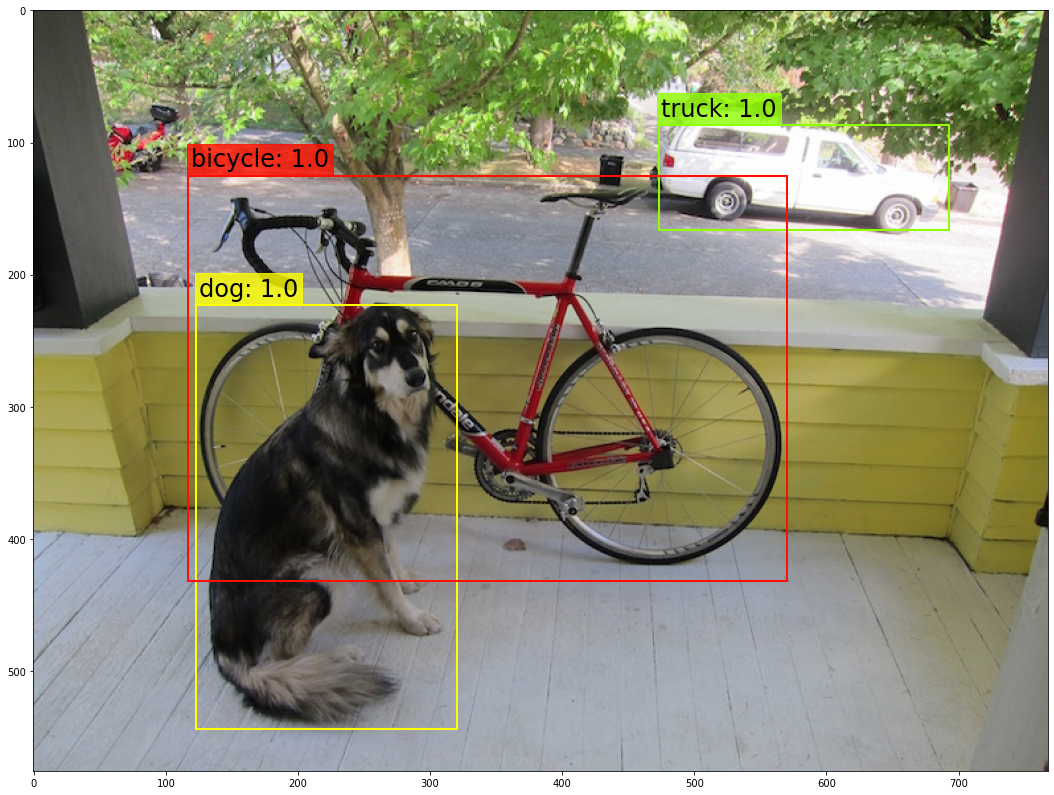

In [33]:
# Set the default figure size
plt.rcParams['figure.figsize'] = [24.0, 14.0]

# Load the image
img = cv2.imread(base_path + 'Yolo/images/dog.jpg')

# Convert the image to RGB
original_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# We resize the image to the input width and height of the first layer of the network.    
resized_image = cv2.resize(original_image, (model.width, model.height))

# Set the IOU threshold. Default value is 0.4
iou_thresh = 0.3

# Set the NMS threshold. Default value is 0.6
nms_thresh = .7

# Detect objects in the image
boxes = detect_objects(model, resized_image, iou_thresh, nms_thresh)

# Print the objects found and the confidence level
print_objects(boxes, class_names)

#Plot the image with bounding boxes and corresponding object class labels
plot_boxes(original_image, boxes, class_names, plot_labels = True)